<a href="https://colab.research.google.com/github/prab-tri/demo/blob/master/ICP10_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ICP10 - Python and Deep Learning**

**Created by  - Prabhanjan Trivedi**

Question 1 - Finding three mistakes in given code.

In [1]:
#importing the important Libraries
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.preprocessing.sequence import pad_sequences

In [2]:
#uploading the file from local drive 
from google.colab import files
uploaded = files.upload()

Saving imdb_master.csv to imdb_master.csv


In [3]:
#Reading the csv file 
df = pd.read_csv('imdb_master.csv',encoding='latin-1')
#Basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  100000 non-null  int64 
 1   type        100000 non-null  object
 2   review      100000 non-null  object
 3   label       100000 non-null  object
 4   file        100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
#printing first 5 rows of dataset
df.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [5]:
#Splitting dataset into features and output labels based on column name
sentences = df['review'].values
y = df['label'].values

In [6]:
#tokenizing data
# create the tokenizer
tokenizer = Tokenizer(num_words=2000)
# fit the tokenizer on the documents
tokenizer.fit_on_texts(sentences)

In [7]:
# summarize what was learned
'''
word_counts: A dictionary of words and their counts.
word_docs: A dictionary of words and how many documents each appeared in.
word_index: A dictionary of words and their uniquely assigned integers.
document_count:An integer count of the total number of documents that were used to fit the Tokenizer.
'''
#print(tokenizer.word_counts)
print(tokenizer.word_docs)
#print(tokenizer.word_index)
print(tokenizer.document_count)

defaultdict(<class 'int'>, {'realized': 1213, 'have': 56897, 'way': 23895, 'there': 38901, 'driven': 931, 'aside': 1813, 'has': 40214, 'few': 13461, 'and': 96558, 'to': 93974, 'overconfident': 10, 'much': 28061, 'around': 12007, 'prior': 695, 'comes': 8429, "costner's": 40, 'cluttered': 51, 'best': 19386, 'stinker': 432, 'again': 12780, 'most': 25900, 'only': 33137, 'do': 26509, 'past': 4324, 'signs': 446, 'until': 6480, 'it': 85097, 'tells': 3073, 'the': 99195, 'or': 41357, 'mr': 3710, 'this': 90594, "kutcher's": 11, 'time': 34525, 'we': 21521, 'half': 6887, 'care': 4820, 'be': 56759, 'by': 47211, 'winning': 1113, 'far': 10134, 'no': 32556, 'are': 55749, 'as': 64161, 'than': 28338, 'all': 51841, 'he': 39147, 'closet': 286, 'should': 15953, 'told': 3796, 'longer': 1914, 'forgotten': 1367, 'keep': 6008, 'well': 30072, 'shows': 7874, 'just': 42111, 'in': 88101, 'his': 42604, 'is': 89562, 'thinks': 1745, 'out': 42529, 'with': 69954, 'sequences': 2562, 'which': 29997, 'hour': 4064, 'movie'

In [8]:
#getting the vocabulary of data
#The texts_to_matrix() function on the Tokenizer can be used to create one vector per document provided per input. 
#The length of the vectors is the total size of the vocabulary.
sentences = tokenizer.texts_to_matrix(sentences)

In [10]:
print('Total length of sentences : {}, same as number of rows in dataset.'.format(len(sentences)))
print('length of each entries in sentences : {}, same as number of words in tokenizer object.'.format(len(sentences[0])))

Total length of sentences : 100000, same as number of rows in dataset.
length of each entries in sentences : 2000, same as number of words in tokenizer object.


In [11]:
#hot encoding for labels
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
#splitting data in test and train with 25% of data for testing
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [12]:
# first correction 
# input shape for model
print('input shape to model is {}.'.format(X_train.shape[1]))
input_dim = np.prod(X_train.shape[1:])

#second correction
#output shape for model
print('Shape of output layer {}'.format(np.unique(y)))

input shape to model is 2000.
Shape of output layer [0 1 2]


In [13]:
#model creation

# activation layer of output model should be softmax
model = Sequential()
model.add(layers.Dense(300,input_dim=input_dim, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [14]:
#Compile and training the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)


Epoch 1/5
293/293 [==============================] - 6s 20ms/step - loss: 0.8807 - acc: 0.5053 - val_loss: 0.8444 - val_acc: 0.5125
Epoch 2/5
293/293 [==============================] - 6s 19ms/step - loss: 0.7929 - acc: 0.5756 - val_loss: 0.8429 - val_acc: 0.5183
Epoch 3/5
293/293 [==============================] - 6s 19ms/step - loss: 0.6907 - acc: 0.6746 - val_loss: 0.8730 - val_acc: 0.5176
Epoch 4/5
293/293 [==============================] - 6s 19ms/step - loss: 0.5030 - acc: 0.8113 - val_loss: 0.9412 - val_acc: 0.5099
Epoch 5/5
293/293 [==============================] - 6s 19ms/step - loss: 0.2948 - acc: 0.9226 - val_loss: 1.0660 - val_acc: 0.5051


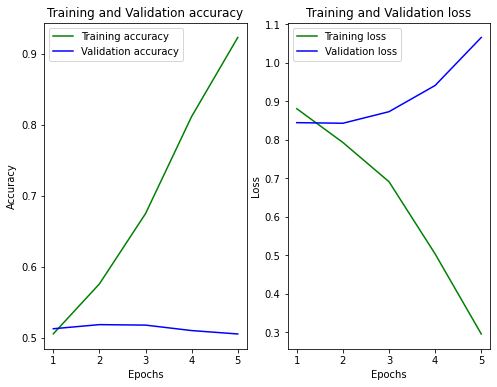

In [15]:
#parameters for plotting the graph
acc_train = history.history['acc']
acc_val = history.history['val_acc']
loss_train = history.history['loss']
loss_val = history.history['val_loss']
#as we have set epochs as 5 in model fitting
epochs = range(1,6)

#plotting accuracy between training and validation data
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs,acc_train , 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


#plotting loss between training and validation data
plt.subplot(1, 2, 2)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
#predicting the model on one test data
print('Actual Value of first test data {}'.format(y_test[0]))
pred = model.predict(X_test)
print('Predicted value is {}'.format(np.argmax(pred[0])))

Actual Value of first test data 2
Predicted value is 2


As we can see from graph, this is really not a good model for this dataset.

**Question 2 -** Using Embedding layer in NN model created previously and check the loss and accuracy results.

In [36]:
# Taking sentences and labels
# .values returns a Numpy array instead of a Pandas Series
sentences = df['review'].values
y = df['label'].values

In [37]:
# tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

In [38]:
# Preparing the data for embedding layer
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1

In [39]:
#getting the vocabulary of data
sentences = tokenizer.texts_to_sequences(sentences)

In [40]:
# padding which indicates whether to add the zeros before or after the sequence.
# # pad_sequences that will be used to pad the sentence sequences to the same length
padded_docs= pad_sequences(sentences,maxlen=max_review_len)

In [41]:
# LabelEncoder to normalize labels.
# Encoding the Target Column
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [42]:
# Splitting the data into test and train
# In this test_size = o.25 means 25% od data for testing and 75% of data for training
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

In [43]:
#Creating model with embedding layers to existing model.
model_2 = Sequential()
model_2.add(Embedding(vocab_size, 50, input_length=max_review_len))
model_2.add(Flatten())
model_2.add(layers.Dense(300, activation='relu'))
model_2.add(layers.Dense(3, activation='softmax'))




In [45]:
#compiling and fitting the model 
model_2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size = 0.25, random_state=1000)
history2=model_2.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 426s 1s/step - loss: 1.0237 - acc: 0.4877 - val_loss: 0.8701 - val_acc: 0.4961
Epoch 2/5
293/293 [==============================] - 430s 1s/step - loss: 0.7877 - acc: 0.5815 - val_loss: 0.8745 - val_acc: 0.4922
Epoch 3/5
293/293 [==============================] - 430s 1s/step - loss: 0.6366 - acc: 0.7000 - val_loss: 0.9794 - val_acc: 0.4921
Epoch 4/5
293/293 [==============================] - 429s 1s/step - loss: 0.4681 - acc: 0.8013 - val_loss: 1.2023 - val_acc: 0.4858
Epoch 5/5
293/293 [==============================] - 428s 1s/step - loss: 0.3257 - acc: 0.8749 - val_loss: 1.4449 - val_acc: 0.4737


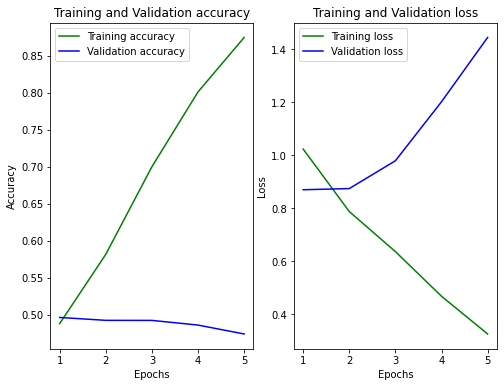

In [46]:
#parameters for plotting the graph
acc_train2 = history2.history['acc']
acc_val2 = history2.history['val_acc']
loss_train2 = history2.history['loss']
loss_val2 = history2.history['val_loss']
#as we have set epochs as 5 in model fitting
epochs = range(1,6)

#plotting accuracy between training and validation data
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs,acc_train2 , 'g', label='Training accuracy')
plt.plot(epochs, acc_val2, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


#plotting loss between training and validation data
plt.subplot(1, 2, 2)
plt.plot(epochs, loss_train2, 'g', label='Training loss')
plt.plot(epochs, loss_val2, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
#predicting the model on one test data
print('Actual Value of first test data {}'.format(y_test[0]))
pred = model_2.predict(X_test)
print('Predicted value is {}'.format(np.argmax(pred[0])))

Actual Value of first test data 2
Predicted value is 2


**Question 3 -** Applying the model created previously on 20_newsgroup data set.

In [3]:
#importing dataset 
from sklearn.datasets import fetch_20newsgroups

In [6]:
#defining Category
categories = ['alt.atheism','sci.space'] 

In [7]:
# 20newsgroup is standard text classification dataset which is collection of app. 20,000 newsgroups documents.
# Create train dataset from 20newsgroup
newsgroups_train =fetch_20newsgroups(subset='train', shuffle=True,categories=categories)

In [8]:
# Extract data from newsgroups train data set.
sentences = newsgroups_train.data
y = newsgroups_train.target
print(np.unique(y))

[0 1]


Here we have 2 target value.

In [9]:
# tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

In [10]:
# Preparing the data for embedding layer
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1

In [11]:
#getting the vocabulary of data
sentences = tokenizer.texts_to_sequences(sentences)

In [12]:
# padding which indicates whether to add the zeros before or after the sequence.
# # pad_sequences that will be used to pad the sentence sequences to the same length
padded_docs= pad_sequences(sentences,maxlen=max_review_len)

In [15]:
# LabelEncoder to normalize labels.
# Encoding the Target Column
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [16]:
# Splitting the data into test and train
# In this test_size = o.25 means 25% od data for testing and 75% of data for training
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

In [17]:
# create a model
model3 = Sequential()
# Adding embedding layers in keras
model3.add(Embedding(vocab_size, 50, input_length=max_review_len))
#  flatten the embedding layer before passing it to the dense layer.
model3.add(Flatten())
# Adding dense layer of 300 units and activation= relu
model3.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
# Adding dense layer of 20 units and activation= softmax
model3.add(layers.Dense(2, activation='softmax'))
# compile the model
model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [20]:
# fit the model
history3=model3.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
4/4 [==============================] - 13s 3s/step - loss: 0.8417 - acc: 0.5410 - val_loss: 0.8718 - val_acc: 0.4052
Epoch 2/5
4/4 [==============================] - 12s 3s/step - loss: 0.7708 - acc: 0.5149 - val_loss: 0.7730 - val_acc: 0.5911
Epoch 3/5
4/4 [==============================] - 12s 3s/step - loss: 0.7203 - acc: 0.5187 - val_loss: 0.7503 - val_acc: 0.6134
Epoch 4/5
4/4 [==============================] - 12s 3s/step - loss: 0.6985 - acc: 0.5871 - val_loss: 0.7803 - val_acc: 0.5799
Epoch 5/5
4/4 [==============================] - 12s 3s/step - loss: 0.6686 - acc: 0.5460 - val_loss: 0.7374 - val_acc: 0.6952


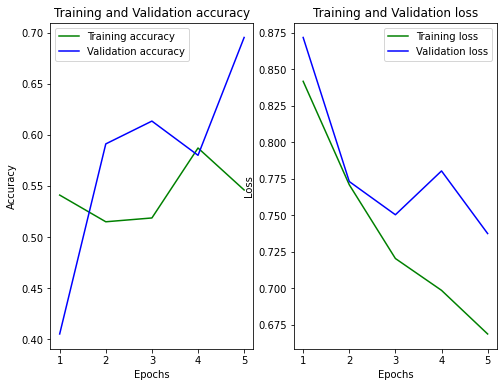

In [21]:
#parameters for plotting the graph
acc_train3 = history3.history['acc']
acc_val3 = history3.history['val_acc']
loss_train3 = history3.history['loss']
loss_val3 = history3.history['val_loss']
#as we have set epochs as 5 in model fitting
epochs = range(1,6)

#plotting accuracy between training and validation data
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs,acc_train3 , 'g', label='Training accuracy')
plt.plot(epochs, acc_val3, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


#plotting loss between training and validation data
plt.subplot(1, 2, 2)
plt.plot(epochs, loss_train3, 'g', label='Training loss')
plt.plot(epochs, loss_val3, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#predicting the model on one test data
print('Actual Value of first test data {}'.format(y_test[0]))
pred = model2.predict(X_test)
print('Predicted value is {}'.format(np.argmax(pred[0])))